## 1、导入工具包

In [329]:
import numpy as np #矩阵
import pandas as pd
import matplotlib.pyplot as plt#画图
import seaborn as sns
#评价指标
from sklearn.metrics import r2_score

%matplotlib inline

## ２、数据探索
### 2.1数据读取

In [330]:
data=pd.read_csv('Ames_House_train.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [331]:
#观察数值型特征，用长用统计量观察分布
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [332]:
print(data.shape)

(1460, 81)


In [333]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [334]:
#缺失太多项的属性不要
data = data.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1)

In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

## 特征工程

In [336]:
#data.isnull().sum()
#删除含有缺失值的所有行
data.replace(np.inf,np.nan)
data=data.dropna(axis=0,how='any')
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [337]:
#对类别形特征，观察其取值范围与直方图
categorical_features =['MSZoning','Street','LotShape','LandContour','Utilities' ,
                       'LotConfig','LandSlope','Neighborhood','Condition1','Condition2'
                       ,'BldgType','HouseStyle','RoofStyle' ,'RoofMatl','Exterior1st' ,
                       'Exterior2nd' ,'MasVnrType','ExterQual','ExterCond','Foundation',
                       'BsmtQual' ,'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2' ,
                       'Heating','HeatingQC','CentralAir','Electrical','KitchenQual' ,'Functional'
                       ,'GarageType','GarageFinish','GarageQual','GarageCond' ,
                       'PavedDrive','SaleType','SaleCondition']    
for col in categorical_features:
    print("\n%s属性的不同取值和出现的次数"%col)
    print(data[col].value_counts())
    data[col]=data[col].astype('object')


MSZoning属性的不同取值和出现的次数
RL         850
RM         173
FV          54
RH           9
C (all)      8
Name: MSZoning, dtype: int64

Street属性的不同取值和出现的次数
Pave    1090
Grvl       4
Name: Street, dtype: int64

LotShape属性的不同取值和出现的次数
Reg    760
IR1    301
IR2     26
IR3      7
Name: LotShape, dtype: int64

LandContour属性的不同取值和出现的次数
Lvl    991
Bnk     45
HLS     44
Low     14
Name: LandContour, dtype: int64

Utilities属性的不同取值和出现的次数
AllPub    1094
Name: Utilities, dtype: int64

LotConfig属性的不同取值和出现的次数
Inside     830
Corner     187
CulDSac     44
FR2         29
FR3          4
Name: LotConfig, dtype: int64

LandSlope属性的不同取值和出现的次数
Gtl    1045
Mod      44
Sev       5
Name: LandSlope, dtype: int64

Neighborhood属性的不同取值和出现的次数
NAmes      173
CollgCr    122
OldTown     96
Somerst     75
NridgHt     74
Edwards     65
Gilbert     49
NWAmes      45
SawyerW     44
Sawyer      44
BrkSide     42
Crawfor     41
NoRidge     33
Mitchel     30
Timber      29
IDOTRR      27
StoneBr     20
SWISU       19
BrDale      15
B

In [338]:
#非数值型数据预处理
x_train_cat = data[categorical_features]
x_train_cat = pd.get_dummies(x_train_cat)
x_train_cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0

In [339]:
#数值型数据
data_numerical = data.drop(categorical_features,axis=1)
data_numerical.info()
#数值类型变量预处理
from sklearn.preprocessing import MinMaxScaler
mn_x = MinMaxScaler()
temp = mn_x.fit_transform(data_numerical)

x_train_num = pd.DataFrame(data=temp,columns=data_numerical.columns,index=data.index)
x_train_num.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 38 columns):
Id               1094 non-null int64
MSSubClass       1094 non-null int64
LotFrontage      1094 non-null float64
LotArea          1094 non-null int64
OverallQual      1094 non-null int64
OverallCond      1094 non-null int64
YearBuilt        1094 non-null int64
YearRemodAdd     1094 non-null int64
MasVnrArea       1094 non-null float64
BsmtFinSF1       1094 non-null int64
BsmtFinSF2       1094 non-null int64
BsmtUnfSF        1094 non-null int64
TotalBsmtSF      1094 non-null int64
1stFlrSF         1094 non-null int64
2ndFlrSF         1094 non-null int64
LowQualFinSF     1094 non-null int64
GrLivArea        1094 non-null int64
BsmtFullBath     1094 non-null int64
BsmtHalfBath     1094 non-null int64
FullBath         1094 non-null int64
HalfBath         1094 non-null int64
BedroomAbvGr     1094 non-null int64
KitchenAbvGr     1094 non-null int64
TotRmsAbvGrd     1094 non-null int64
F

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.000000,0.235294,0.150685,0.033420,0.625,0.428571,0.946154,0.883333,0.12250,0.125089,0.0,0.064212,0.125062,0.098260,0.413559,0.0,0.244427,0.5,0.0,0.666667,0.5,0.500000,0.0,0.555556,0.000000,0.936364,0.333333,0.308426,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.240644
1,0.000685,0.000000,0.202055,0.038795,0.500,0.857143,0.738462,0.433333,0.00000,0.173281,0.0,0.121575,0.192673,0.193700,0.000000,0.0,0.158340,0.0,0.5,0.666667,0.0,0.500000,0.0,0.333333,0.333333,0.690909,0.333333,0.238474,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.203128
2,0.001371,0.235294,0.160959,0.046507,0.625,0.428571,0.930769,0.866667,0.10125,0.086109,0.0,0.185788,0.135720,0.113305,0.419370,0.0,0.259032,0.5,0.0,0.666667,0.5,0.500000,0.0,0.333333,0.333333,0.918182,0.333333,0.356121,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.261487
3,0.002056,0.294118,0.133562,0.038561,0.625,0.428571,0.269231,0.333333,0.00000,0.038271,0.0,0.231164,0.108410,0.122943,0.366102,0.0,0.245772,0.5,0.0,0.333333,0.0,0.500000,0.0,0.444444,0.333333,0.890909,0.666667,0.383148,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.145464
4,0.002742,0.235294,0.215753,0.060576,0.750,0.428571,0.923077,0.833333,0.21875,0.116052,0.0,0.209760,0.173189,0.166197,0.509927,0.0,0.338201,0.5,0.0,0.666667,0.5,0.666667,0.0,0.666667,0.333333,0.909091,0.666667,0.537361,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.298308


In [340]:
FE_train = pd.concat([x_train_cat,x_train_num],axis=1,ignore_index=False)
FE_train.head()


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCa

In [341]:
FE_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Columns: 261 entries, MSZoning_C (all) to SalePrice
dtypes: float64(38), uint8(223)
memory usage: 571.6 KB


In [342]:
y = FE_train.SalePrice.values
X = FE_train.drop('SalePrice',axis=1)

columns = X.columns
print(columns)

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3',
       ...
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object', length=260)


In [343]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#分割
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5,test_size=0.2)

#数据标准化
ss_X = StandardScaler()
ss_y = StandardScaler()

#标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

y_train = ss_y.fit_transform(y_train.reshape(-1,1))
y_test = ss_y.transform(y_test.reshape(-1,1))

## OLS

In [344]:
#OLS
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#训练
lr.fit(X_train,y_train)
#predict
y_test_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_train)
#查看权重系数的绝对值
fs = pd.DataFrame({"columns":list(columns),"coef":list(lr.coef_.T)})
fs.sort_values(by=['coef'],ascending=False)

,columns,coef
98,Exterior1st_Stone,[4410137222876.025]
164,HeatingQC_Ex,[2154635999441.4312]
107,Exterior2nd_CBlock,[2083407884628.7952]
168,HeatingQC_TA,[1933224603393.1553]
179,KitchenQual_TA,[1853545579959.8994]
178,KitchenQual_Gd,[1836359327298.107]
174,Electrical_Mix,[1606362136596.109]
166,HeatingQC_Gd,[1598071972815.5557]
15,Utilities_AllPub,[1575020426178.953]
14,LandContour_Lvl,[1459079289055.8403]


In [345]:
#F2_score评价
print("The r2_score of LinearRegression on test is "+str(r2_score(y_test,y_test_pred_lr)))
print("The r2_score of LinearRegression on train is "+str(r2_score(y_train,y_train_pred_lr)))

The r2_score of LinearRegression on test is -7.46787557786536e+25
The r2_score of LinearRegression on train is 0.93314713124779


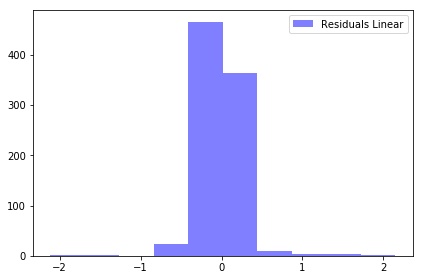

In [346]:
#观测残差分布
f,ax = plt.subplots()
f.tight_layout()
ax.hist(y_train-y_train_pred_lr,label = 'Residuals Linear',color='b',alpha=.5)
ax.legend(loc='best')

Text(0,0.5,'pred_scalePrice')

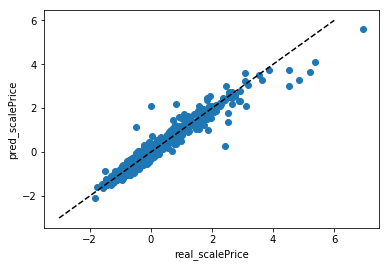

In [347]:
plt.figure()
plt.scatter(y_train,y_train_pred_lr)
plt.plot([-3,6],[-3,6],'--k')
plt.axis('tight')
plt.xlabel('real_scalePrice')
plt.ylabel('pred_scalePrice')

In [348]:
#随机梯度下降优化模型
from sklearn.linear_model import SGDRegressor

#迭代次数
sgdr = SGDRegressor(max_iter=1000)

#训练
sgdr.fit(X_train,y_train)

#预测
sgdr_pred_test = sgdr.predict(X_test)

sgdr.coef_

/home/danke/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-2.35500347e+02,  6.64696270e+01, -3.09717609e+02,  1.63898976e+02,
       -8.35899384e+01,  3.66882718e+02, -3.66882718e+02,  8.93220977e+01,
       -1.87777884e+01, -6.12020510e+01, -7.19074728e+01, -8.17523431e+01,
        6.30627457e+00,  2.78675205e+02, -4.63175403e+01,  0.00000000e+00,
        8.62514954e+01, -4.48576295e+01, -1.16846946e+02, -5.80825998e+01,
       -1.21936814e+00,  2.69994875e+02, -2.90557779e+02,  3.10971511e+01,
        1.59896203e+02, -4.85362407e+01, -2.91624958e+02, -4.45120392e+01,
        9.42829599e+01,  2.04570705e+02,  2.32051596e+02, -1.76988334e+02,
        1.77482588e+02, -5.09704917e+01, -3.97892023e+01,  1.18641489e+02,
       -3.52286243e+02,  2.95474949e+01, -2.02460957e+01,  3.37270408e+02,
        1.31654877e+02, -4.48501941e+02,  1.24450212e+02, -1.08568182e+02,
        1.44111998e+02,  1.66774979e+02, -6.60338122e+00,  6.99451680e+01,
        1.00599560e+01,  2.46417980e+02, -1.33082431e+02, -6.46100012e+01,
        5.63683727e+01,  

In [349]:
print('The value of default measurement of SGDRegressor on test is '+str(r2_score(y_test,y_test_pred_lr)))
print('The value of default measurement of SGDRegressor on train is '+str(r2_score(y_train,y_train_pred_lr)))

The value of default measurement of SGDRegressor on test is -7.46787557786536e+25
The value of default measurement of SGDRegressor on train is 0.93314713124779


## Ridge

In [350]:
from sklearn.linear_model import RidgeCV

#设置正则参数
alphas = [0.01,0.1 , 10 ,100,1000,3000,5000,10000]

#实例化
ridge = RidgeCV(alphas=alphas,store_cv_values=True)

#训练
ridge.fit(X_train,y_train)

#预测
y_test_pred_ridge = ridge.predict(X_test)
y_train_pred_ridge = ridge.predict(X_train)

#评估
print('The r2 score of RidgeCV on test is'+str(r2_score(y_test, y_test_pred_ridge)))
print('The r2 score of RidgeCV on train is'+str(r2_score(y_train, y_train_pred_ridge)))

The r2 score of RidgeCV on test is0.7078671464513284
The r2 score of RidgeCV on train is0.8974631223044615


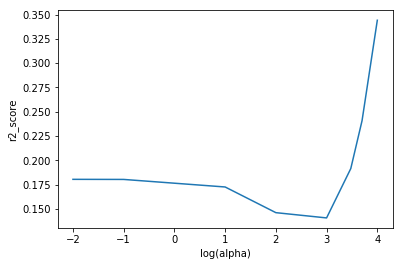

alphas is:  1000.0


In [351]:
#可视化
r2_mean = np.mean(ridge.cv_values_,axis=0)
plt.plot(np.log10(alphas),r2_mean.reshape(len(alphas),1))

plt.xlabel('log(alpha)')
plt.ylabel('r2_score')
plt.show()

print('alphas is: ',ridge.alpha_)

In [352]:
#查看系数
fs = pd.DataFrame({'columns':list(columns),"coef_lr":list(lr.coef_.T),"coef_ridge":list(ridge.coef_.T)})
fs.sort_values(by=['coef_ridge'],ascending=False)

,columns,coef_lr,coef_ridge
239,GrLivArea,[572530330620.5453],[0.0757692382351284]
227,OverallQual,[0.12276458740234375],[0.06860569961097665]
235,TotalBsmtSF,[-237362422381.08804],[0.05693633653545096]
136,BsmtQual_Ex,[-298934893217.3159],[0.05543923655305781]
176,KitchenQual_Ex,[986734040714.9823],[0.055190692652807766]
236,1stFlrSF,[-423929009446.2424],[0.053946955742627326]
123,ExterQual_Ex,[40972862803.410416],[0.05221910082142252]
246,TotRmsAbvGrd,[0.02459716796875],[0.04996208577469364]
231,MasVnrArea,[0.061492919921875],[0.048331202275590956]
232,BsmtFinSF1,[267260502645.2426],[0.04819656498307013]


## Lasso(L1正则)

In [353]:
from sklearn.linear_model import LassoCV

alphas=[0.001,0.01,0.1,1,10,100,1000]
#实例化
lasso = LassoCV(alphas=alphas)

#训练
lasso.fit(X_train,y_train)

#测试
y_test_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)

#评估
print('The r2 score of LassoCV on test is'+str(r2_score(y_test, y_test_pred_lasso)))
print('The r2 score of LassoCV on train is'+str(r2_score(y_train, y_train_pred_lasso)))

The r2 score of LassoCV on test is0.6637149511149643
The r2 score of LassoCV on train is0.9209904275802094


/home/danke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


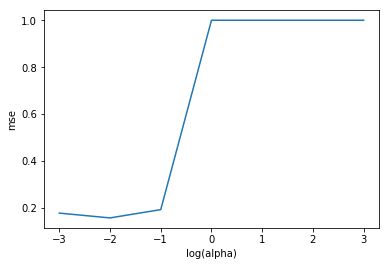

alphas is: 0.01


In [354]:
mses = np.mean(lasso.mse_path_,axis=1)
plt.plot(np.log10(lasso.alphas_),mses)
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print('alphas is:',lasso.alpha_)

In [355]:
#查看权重系数
fs = pd.DataFrame({"columns":list(columns), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T)), "coef_lasso":list((lasso.coef_.T))})
fs.sort_values(by=['coef_ridge'],ascending=False)

,columns,coef_lr,coef_ridge,coef_lasso
239,GrLivArea,[572530330620.5453],[0.0757692382351284],0.299745
227,OverallQual,[0.12276458740234375],[0.06860569961097665],0.145793
235,TotalBsmtSF,[-237362422381.08804],[0.05693633653545096],0.074799
136,BsmtQual_Ex,[-298934893217.3159],[0.05543923655305781],0.072593
176,KitchenQual_Ex,[986734040714.9823],[0.055190692652807766],0.074512
236,1stFlrSF,[-423929009446.2424],[0.053946955742627326],0.000000
123,ExterQual_Ex,[40972862803.410416],[0.05221910082142252],0.069764
246,TotRmsAbvGrd,[0.02459716796875],[0.04996208577469364],0.006971
231,MasVnrArea,[0.061492919921875],[0.048331202275590956],0.047231
232,BsmtFinSF1,[267260502645.2426],[0.04819656498307013],0.087932


根据r2_socre ,ridge_cv表现最好
## 对数据进行预测

In [363]:
need_pred_data=pd.read_csv('Ames_House_test.csv')
#删除一些不用的属性
need_pred_data=need_pred_data.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis=1)
#删除有缺失数据的行
need_pred_data=need_pred_data.replace(np.inf,np.nan)
need_pred_data=need_pred_data.dropna(axis=0,how='any')
need_pred_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [358]:
#非数值型数据处理
need_data_cat = need_pred_data[categorical_features]
need_data_cat = pd.get_dummies(x_train_cat)
need_data_cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0

In [365]:
#数值类型数据处理
need_data_num = need_pred_data.drop(categorical_features,axis=1)

#need_pred_data的预处理器没有sclePrice
data_numerical_need = data_numerical.drop('SalePrice',axis=1)
mn_need = MinMaxScaler()
mn_need.fit_transform(data_numerical_need)
temp=mn_need.transform(need_data_num)

need_data_num = pd.DataFrame(data=temp,columns=need_data_num.columns,index= need_data_num.index)
need_data_num.head()
#need_data_num.info()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.000685,0.000000,0.202055,0.048246,0.375,0.571429,0.623077,0.183333,0.0000,0.082920,0.097693,0.115582,0.129392,0.107663,0.000000,0.0,0.088009,0.0,0.0,0.333333,0.0,0.333333,0.0,0.222222,0.000000,0.554545,0.000000,0.453100,0.163361,0.000000,0.0,0.0,0.25,0.0,0.0,0.454545,1.0
1,1.001371,0.000000,0.205479,0.060609,0.500,0.571429,0.600000,0.133333,0.0675,0.163536,0.000000,0.173801,0.203830,0.209450,0.000000,0.0,0.171214,0.0,0.0,0.333333,0.5,0.500000,0.0,0.333333,0.000000,0.527273,0.000000,0.120827,0.458576,0.065814,0.0,0.0,0.00,0.0,5.0,0.454545,1.0
2,1.002056,0.235294,0.181507,0.058566,0.375,0.428571,0.900000,0.800000,0.0000,0.140149,0.000000,0.058647,0.137052,0.115186,0.339467,0.0,0.228862,0.0,0.0,0.666667,0.5,0.500000,0.0,0.333333,0.333333,0.881818,0.333333,0.255962,0.247375,0.062157,0.0,0.0,0.00,0.0,0.0,0.181818,1.0
3,1.002742,0.235294,0.195205,0.040562,0.500,0.571429,0.907692,0.800000,0.0125,0.106662,0.000000,0.138699,0.136719,0.114716,0.328329,0.0,0.224058,0.0,0.0,0.666667,0.5,0.500000,0.0,0.444444,0.333333,0.890909,0.333333,0.246423,0.420070,0.065814,0.0,0.0,0.00,0.0,0.0,0.454545,1.0
4,1.003427,0.588235,0.075342,0.017318,0.750,0.428571,0.861538,0.700000,0.0000,0.046598,0.000000,0.435360,0.195670,0.197931,0.000000,0.0,0.161799,0.0,0.0,0.666667,0.0,0.333333,0.0,0.222222,0.000000,0.836364,0.333333,0.275040,0.000000,0.149909,0.0,0.0,0.30,0.0,0.0,0.000000,1.0


In [366]:
data_need = pd.concat([need_data_cat,need_data_num],axis=1,ignore_index=False)
data_need.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCa

In [375]:
#预测
data_need.replace(np.inf,np.nan)
data_need = data_need.dropna(axis=0,how='any')
data_need_pred_ridge = ridge.predict(data_need)